In [3]:
%matplotlib inline

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file

## 데이터 톺아보기

### 데이터 가져오기

In [4]:
fpath = get_file("mnist_detection.npz",
                 "https://craftsangjae.s3.ap-northeast-2.amazonaws.com/data/mnist_detection.npz")
data = np.load(fpath)

train_images = data['train_images']
train_labels = data['train_labels']
test_images = data['test_images']
test_labels = data['test_labels']

### 이미지 살펴보기

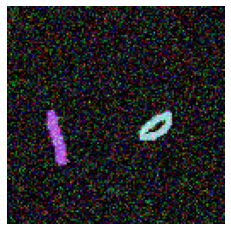

In [5]:
# 첫번째 이미지 가져오기
image = train_images[0]

plt.imshow(image)
plt.axis('off')
plt.show()

###  라벨 살펴보기

현재 라벨은 각 행이 **[이미지 인덱스, cx, cy, w, h, 클래스]**으로 구성되어 있습니다. 첫번째 이미지에 대한 정보를 가져오고 싶으면 아래와 같이 코드를 작성하면 됩니다.

In [6]:
target_index = 0
target_labels = train_labels[train_labels[:,0]==target_index]
target_labels

array([[ 0, 86, 69, 20, 18,  0],
       [ 0, 29, 77, 14, 33,  1]])

### 라벨 시각화하기

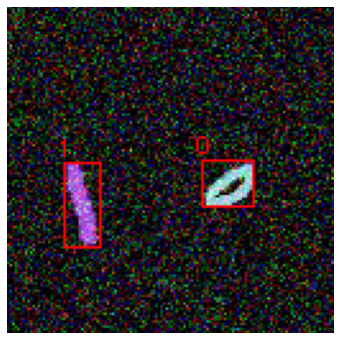

In [7]:
target_index = 0
target_image = train_images[target_index].copy()
target_labels = train_labels[train_labels[:,0]==target_index]

for label in target_labels:
    cx, cy, w, h = label[1:5]
    cls = label[-1]
    
    cv2.rectangle(target_image, 
                  (cx-w//2,cy-h//2), 
                  (cx-w//2+w,cy-h//2+h),
                  (255,0,0),1)
    
    cv2.putText(target_image, str(cls), 
                (cx-w//2-3,cy-h//2-3),
                cv2.FONT_HERSHEY_SIMPLEX, 
                0.3, (255,0,0), 1)

plt.figure(figsize=(6,6))
plt.imshow(target_image)
plt.axis('off')
plt.show()

### 데이터의 특성

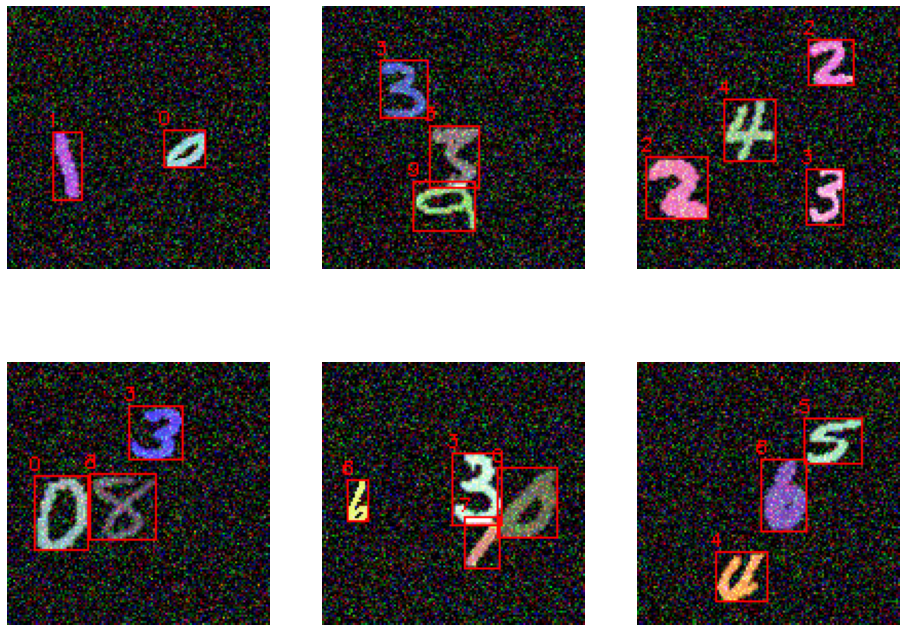

In [8]:
fig = plt.figure(figsize=(16,12))

sample_index = [0,3,5,19,21,82]

for idx, target_index in enumerate(sample_index,1):
    target_image = train_images[target_index].copy()
    target_labels = train_labels[train_labels[:,0]==target_index]
    for label in target_labels:
        cx, cy, w, h, cls = label[1:]
        cv2.rectangle(target_image, (cx-w//2,cy-h//2), 
                      (cx-w//2+w,cy-h//2+h), (255,0,0),1)

        cv2.putText(target_image, str(cls), (cx-w//2-3,cy-h//2-3),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,0,0), 1)
    ax = fig.add_subplot(2, 3, idx)
    ax.imshow(target_image)
    ax.axis('off')
plt.show()

1. 영상마다 물체의 갯수가 상이함
2. 물체의 크기가 다양
3. 겹쳐진 경우가 존재 


> Object Detection은 이런 다양한 문제 경우가 존재합니다. 이러한 문제들을 해결하기 위해, 연구자들은 `SSD`와 같은 알고리즘을 제시합니다. 이번 시간에는 `SSD`를 처음부터 끝까지 모두 구현하면서 파악해보도록 하겠습니다.